# 读取数据

In [3]:
import numpy as np
import pandas as pd

data=pd.read_csv('./data/insurance.csv', sep=',')
data.head(n=6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


# EDA数据探索

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

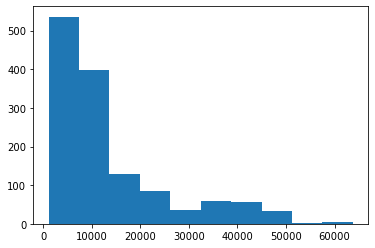

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data['charges'])

(array([ 46., 105., 101., 155., 198., 283., 156., 123., 115.,  56.]),
 array([ 7.02275569,  7.42678461,  7.83081352,  8.23484244,  8.63887136,
         9.04290027,  9.44692919,  9.8509581 , 10.25498702, 10.65901594,
        11.06304485]),
 <a list of 10 Patch objects>)

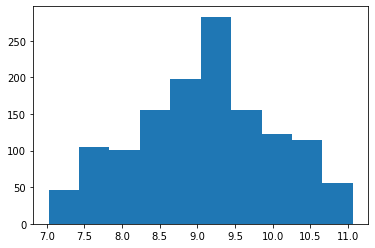

In [5]:
plt.hist(np.log(data['charges']))  # np.log()函数对数据作正态分布

# 特征工程

In [6]:
data=pd.get_dummies(data)  # get_dummies()函数可以将非数值数据做离散化
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [7]:
x=data.drop('charges', axis=1)
y=data['charges']

x.fillna(0, inplace=True)  # True为直接修改原对象，False为创建一个副本，修改副本，原对象不变（缺省默认）
y.fillna(0, inplace=True)
x.tail()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1333,50,30.97,3,0,1,1,0,0,1,0,0
1334,18,31.92,0,1,0,1,0,1,0,0,0
1335,18,36.85,0,1,0,1,0,0,0,1,0
1336,21,25.80,0,1,0,1,0,0,0,0,1
1337,61,29.07,0,1,0,0,1,0,1,0,0


In [8]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)  # 将数据切分为训练集和测试集

In [10]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler(with_mean=True, with_std=True)  # 实际上将使用数据的真实μ和σ
scaler.fit(x_train)
x_train_scaler=scaler.transform(x_train)  # 归一化
x_test_scaler=scaler.transform(x_test)
x_train_scaler

array([[ 0.21446839, -0.6115656 , -0.90761888, ..., -0.57570539,
        -0.59380229,  1.7271302 ],
       [ 0.21446839,  0.87362605,  0.7679852 , ..., -0.57570539,
        -0.59380229,  1.7271302 ],
       [ 0.35852466, -1.40672719,  0.7679852 , ..., -0.57570539,
        -0.59380229, -0.57899515],
       ...,
       [-0.14567229, -1.0421043 ,  0.7679852 , ...,  1.73699953,
        -0.59380229, -0.57899515],
       [ 0.57460906, -0.74089409, -0.06981684, ..., -0.57570539,
        -0.59380229, -0.57899515],
       [-0.43378483,  0.47979995,  3.28139133, ..., -0.57570539,
         1.68406222, -0.57899515]])

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)  # 升维
x_train_scaled=poly_features.fit_transform(x_train_scaler)
x_test_scaled=poly_features.fit_transform(x_test_scaler)

# 模型训练

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

line_reg=LinearRegression()
ridg_reg=Ridge(alpha=10)
grad_reg=GradientBoostingRegressor()

In [26]:
line_reg.fit(x_train_scaled, np.log1p(y_train))  # np.log1p()是优化后的np.log()，对数据做正态分布
ridg_reg.fit(x_train_scaled, np.log1p(y_train))
grad_reg.fit(x_train_scaled, np.log1p(y_train))

GradientBoostingRegressor()

In [27]:
y_line_predict=line_reg.predict(x_test_scaled)
y_ridg_predict=ridg_reg.predict(x_test_scaled)
y_grad_predict=grad_reg.predict(x_test_scaled)

# 模型评估

In [28]:
from sklearn.metrics import mean_squared_error

line_train_error=np.sqrt(mean_squared_error(y_true=np.log1p(y_train), y_pred=line_reg.predict(x_train_scaled)))  # 训练集误差
line_test_error =np.sqrt(mean_squared_error(y_true=np.log1p(y_test), y_pred=y_line_predict))  # 测试集误差

ridge_train_error=np.sqrt(mean_squared_error(y_true=np.log1p(y_train), y_pred=ridg_reg.predict(x_train_scaled)))  # 训练集误差
ridge_test_error =np.sqrt(mean_squared_error(y_true=np.log1p(y_test), y_pred=y_ridg_predict))  # 测试集误差

grad_train_error=np.sqrt(mean_squared_error(y_true=np.log1p(y_train), y_pred=grad_reg.predict(x_train_scaled)))  # 训练集误差
grad_test_error =np.sqrt(mean_squared_error(y_true=np.log1p(y_test), y_pred=y_grad_predict))  # 测试集误差

line_train_error, line_test_error, ridge_train_error, ridge_test_error, grad_train_error, grad_test_error

(0.35709399868135605,
 0.3933968709431325,
 0.35534755075940777,
 0.3930283728819051,
 0.25549830935125745,
 0.4113627774935385)

In [29]:
line_train_error=np.sqrt(mean_squared_error(y_true=y_train, y_pred=np.exp(line_reg.predict(x_train_scaled))))
line_test_error =np.sqrt(mean_squared_error(y_true=y_test, y_pred=np.exp(y_line_predict)))

ridge_train_error=np.sqrt(mean_squared_error(y_true=y_train, y_pred=np.exp(ridg_reg.predict(x_train_scaled))))
ridge_test_error =np.sqrt(mean_squared_error(y_true=y_test, y_pred=np.exp(y_ridg_predict)))

grad_train_error=np.sqrt(mean_squared_error(y_true=y_train, y_pred=np.exp(grad_reg.predict(x_train_scaled))))
grad_test_error =np.sqrt(mean_squared_error(y_true=y_test, y_pred=np.exp(y_grad_predict)))

line_train_error, line_test_error, ridge_train_error, ridge_test_error, grad_train_error, grad_test_error

(5170.491593257121,
 5365.119724480067,
 5033.246102686306,
 5340.7357452796,
 3558.678431197355,
 4839.53191312209)